In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib


In [2]:
#importing dataset
df = pd.read_csv(r'uber data.csv')


In [3]:
# As this is Taxi fare data and we know there are many factors which affect the price of taxi like
# Travelled distance
# Time of Travel
# Demand and Availability of Taxi
# Some special places are more costlier like Airport or other places where there might be toll

In [4]:
df.shape #to get the total rows and columns

(200000, 8)

In [5]:
# df.head()

In [6]:
# df.info()

In [7]:
# df.describe() # to get reqired information of the dataset

In [8]:
df.columns #to get number of columns in the dataset,#we need to predict that for a given pickup point to the drop of location what will be the price,

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
# df

In [10]:
df.drop('key',axis=1,inplace=True)# key not necessary for prediction

In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
#filling values
# x=df['dropoff_longitude'].mean()
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_16992\3644124193.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16992\3644124193.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [13]:
# df.isna().sum()

In [14]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [15]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce',utc=True) #if coerce then invalid parsing will be set as Nan

In [16]:
#only series datatype has the dt attribute
df['day']  = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year']  = df['pickup_datetime'].dt.year
df['dayofweek']   = df['pickup_datetime'].dt.weekday   # 0 = Monday, 6 = Sunday
df['hour']  = df['pickup_datetime'].dt.hour

In [17]:
x=df['fare_amount'].value_counts()

In [18]:
df.drop(['pickup_datetime'], axis=1, inplace=True)


<Axes: >

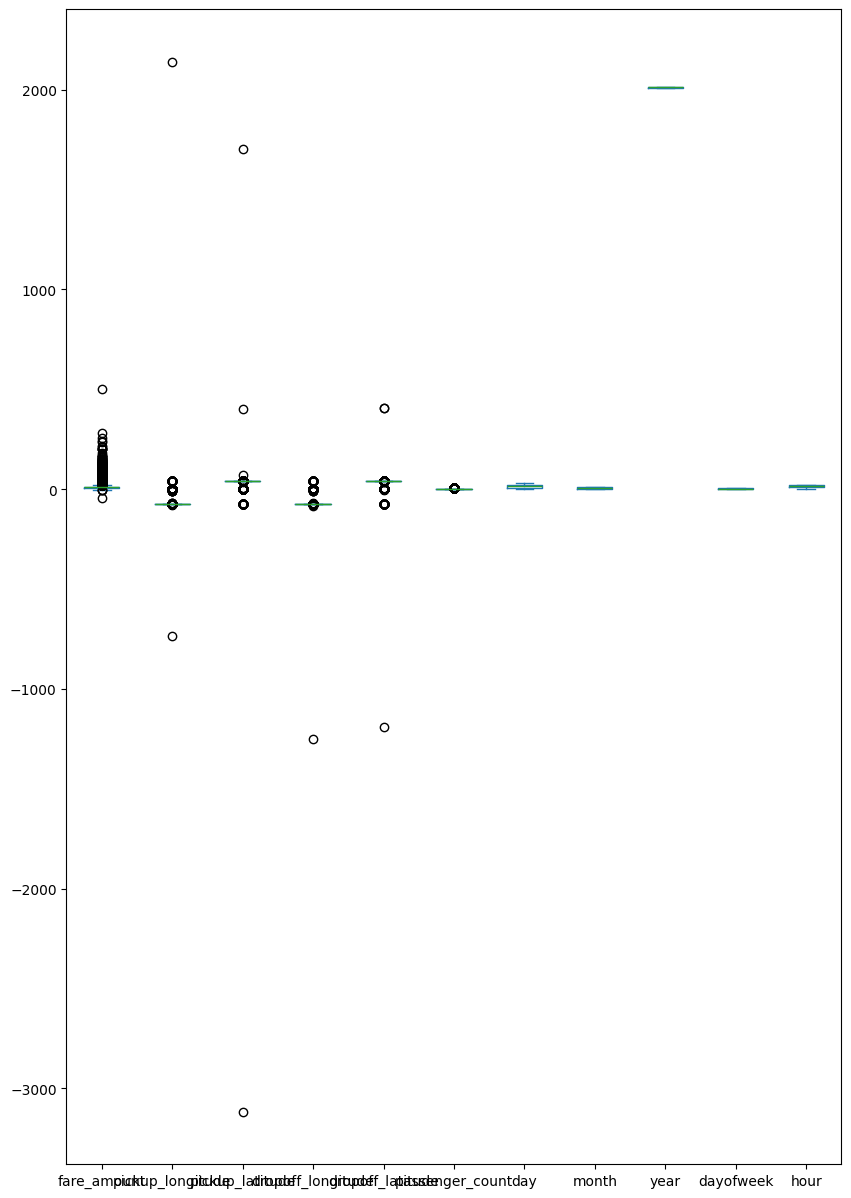

In [19]:
#these are the boxplote of each numerical column .if graph in single column subplot=False
df.plot(kind='box',subplots=False,layout=(7,2),figsize=(10,15))

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day                     Axes(0.125,0.448049;0.352273x0.0939024)
month                Axes(0.547727,0.448049;0.352273x0.0939024)
year                    Axes(0.125,0.335366;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.335366;0.352273x0.0939024)
hour                    Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

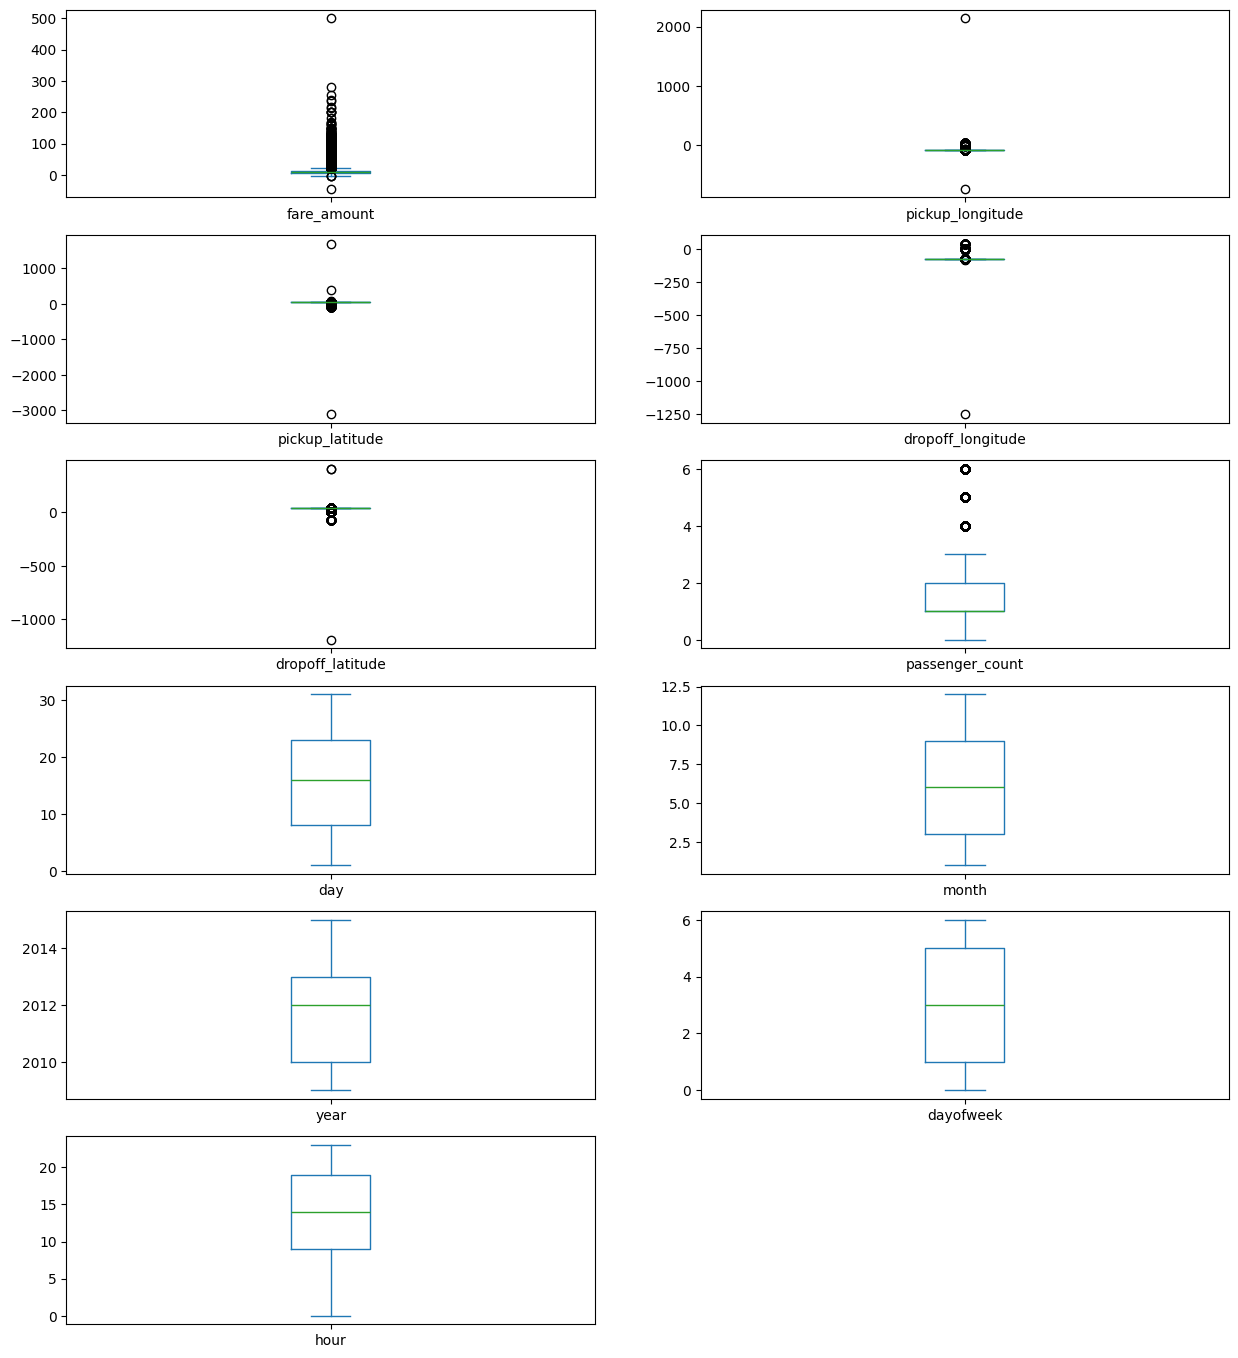

In [20]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [21]:
#elimination of the outliers
def remove_outlier(df1,col):
    Q1=df1[col].quantile(0.25)
    Q2=df1[col].quantile(0.50)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    print("****************************************")
    print("col=",col,"Q1=",Q1,"Q2=",Q2,"Q3=",Q3)
    print("*******************************")
    df1[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1
def treat_outliers_all(df1,col_list):
    print("col_list",col_list)
    for c in col_list:
        df1=remove_outlier(df1,c)
    return(df1)    

In [22]:
df=treat_outliers_all(df,df.columns)

col_list Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'day',
       'month', 'year', 'dayofweek', 'hour'],
      dtype='object')
****************************************
col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
*******************************
****************************************
col= pickup_longitude Q1= -73.99205 Q2= -73.98174300000001 Q3= -73.96706800000001
*******************************
****************************************
col= pickup_latitude Q1= 40.735006750000004 Q2= 40.75276142041015 Q3= 40.76712725
*******************************
****************************************
col= dropoff_longitude Q1= -73.991295 Q2= -73.98007199999999 Q3= -73.96350799999999
*******************************
****************************************
col= dropoff_latitude Q1= 40.734092 Q2= 40.753225 Q3= 40.76807
*******************************
****************************************
col= passenger_count Q1= 1.0 

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day                     Axes(0.125,0.448049;0.352273x0.0939024)
month                Axes(0.547727,0.448049;0.352273x0.0939024)
year                    Axes(0.125,0.335366;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.335366;0.352273x0.0939024)
hour                    Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

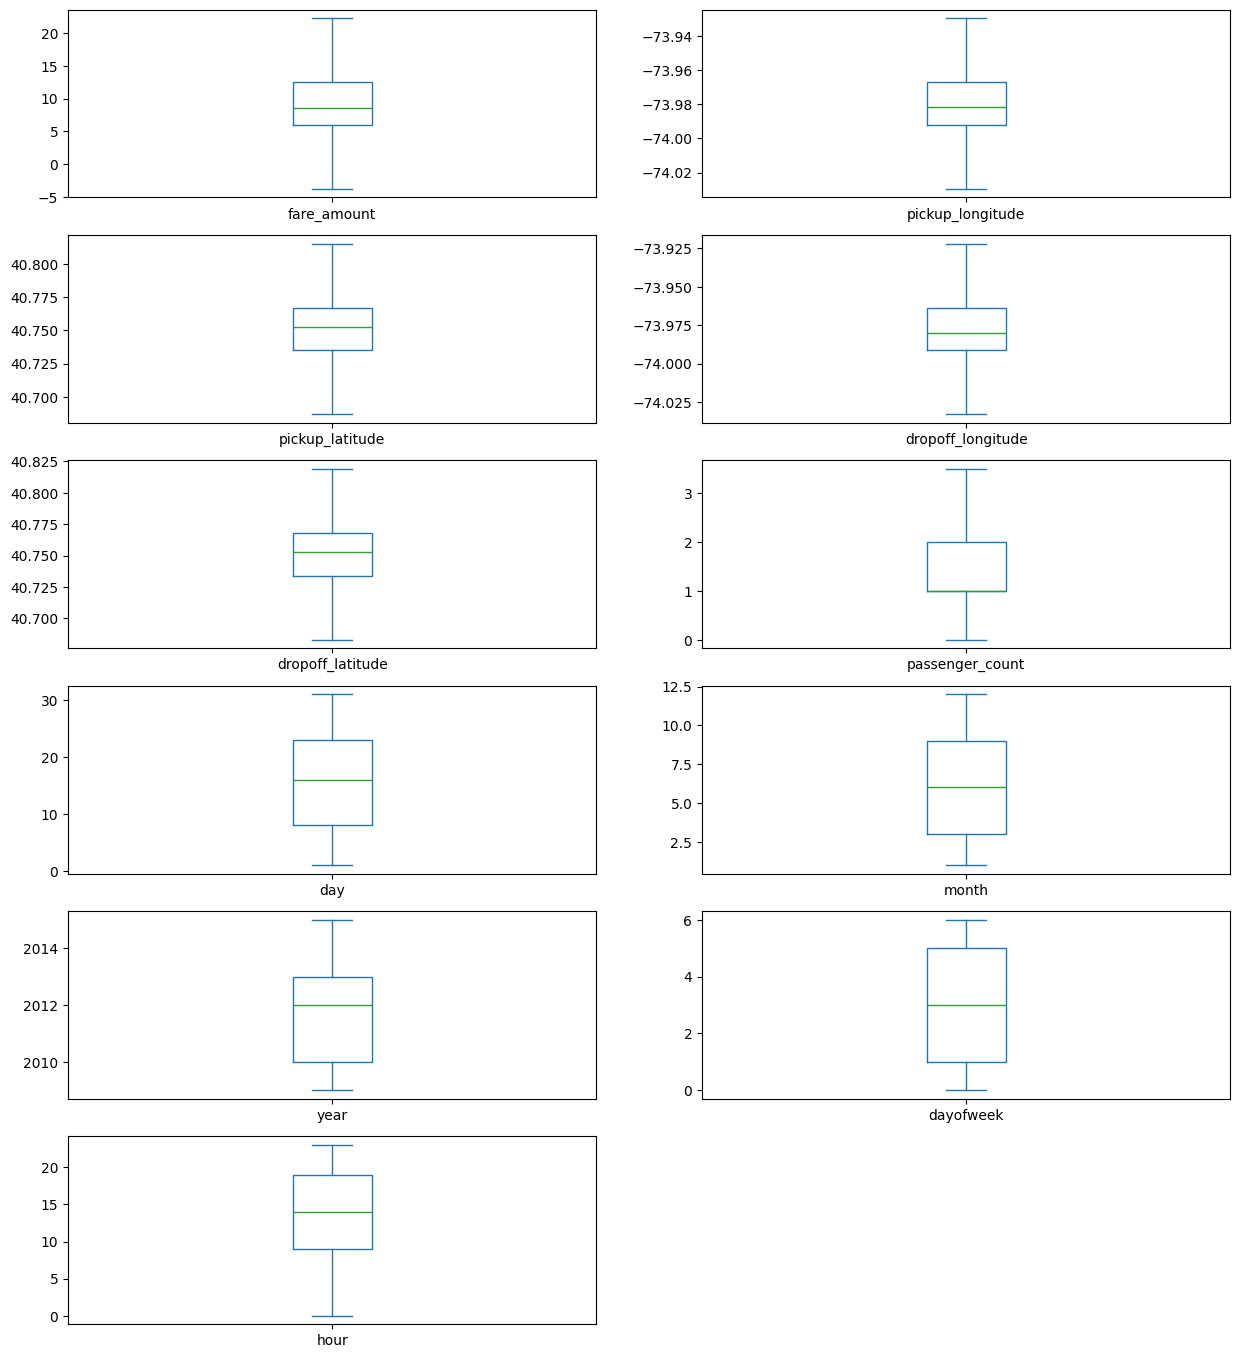

In [23]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [24]:
#finding incorrect latitude (less than -90 or greater than 90) and longitude (greater than 180 or less than -180)
incorrect_coordinates=df.loc[(df.pickup_latitude>90)| (df.pickup_latitude<-90)|
                             (df.dropoff_latitude>90)|(df.dropoff_latitude<-90)|
                             (df.pickup_longitude>180)|(df.pickup_longitude<-180)|
                             (df.dropoff_longitude >90)|(df.dropoff_longitude <-90)]
                      

In [25]:
incorrect_coordinates

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, day, month, year, dayofweek, hour]
Index: []

In [26]:
# pip install haversine

In [27]:
#haversine distance formula
#calculate the distance using haversine to calculate the distance between two points.cant use euclidean as it is for flat surface
import haversine as hs
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2=[df["pickup_longitude"][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1=(lati1,long1)
    loc2=(lati2,long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)
print(travel_dist)
df['dist_travel_km']=travel_dist
   
                             



[1.1996720414906963, 8.450145267627628, 1.389527145063717, 2.799274106500232, 1.9991595493487855, 3.7872443159394145, 1.5558088083217372, 4.155450031589928, 1.2532332437623896, 2.849630732179566, 1.374578898240458, 0.773514320954494, 0.717768478875796, 2.0193866164896543, 1.6714469067727284, 0.773514320954494, 2.609778098519423, 1.5119063360507798, 0.9219529917084901, 0.3991791217677804, 1.6868636601614833, 2.2924729664118466, 0.9242970093305823, 1.4039601178314562, 1.017774494036965, 2.531950194466912, 0.773514320954494, 0.32877130680263067, 4.0734687169943555, 0.8081542770573669, 0.8719144733368965, 4.3694282163651375, 4.6524120566156935, 1.3815904149288538, 6.428581234815545, 9.87820876218045, 0.8067001947806827, 0.9518021545943864, 2.3438057139560136, 3.585995667560736, 1.6435703295463249, 5.0139427529192275, 5.748266780442455, 5.456878010640991, 0.9470373753695209, 2.5486187066016717, 0.9927391075301688, 0.461854108460356, 0.5503279999097366, 1.6478854993582999, 2.4993190694319773

In [28]:
#uber does not travel over 130 kms so minimize the distance
df=df[(df.dist_travel_km>=1)&(df.dist_travel_km<=130)]
print("remaining observation in the dataset:",df.shape)

remaining observation in the dataset: (162822, 12)


In [29]:
bool_df=df.isnull()
bool_df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0             False             False            False              False   
1             False             False            False              False   
2             False             False            False              False   
3             False             False            False              False   
4             False             False            False              False   
...             ...               ...              ...                ...   
199995        False             False            False              False   
199996        False             False            False              False   
199997        False             False            False              False   
199998        False             False            False              False   
199999        False             False            False              False   

        dropoff_latitude  passenger_count    day  month   year  dayofweek  \
0                  False            False  False  False  False      False   
1                  False            False  False  False  False      False   
2                  False            False  False  False  False      False   
3                  False            False  False  False  False      False   
4                  False            False  False  False  False      False   
...                  ...              ...    ...    ...    ...        ...   
199995             False            False  False  False  False      False   
199996             False            False  False  False  False      False   
199997             False            False  False  False  False      False   
199998             False            False  False  False  False      False   
199999             False            False  False  False  False      False   

         hour  dist_travel_km  
0       False           False  
1       False           False  
2       False           False  
3       False           False  
4       False           False  
...       ...             ...  
199995  False           False  
199996  False           False  
199997  False           False  
199998  False           False  
199999  False           False  

[162822 rows x 12 columns]

In [30]:
(df == 0).sum()

fare_amount              1
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count        578
day                      0
month                    0
year                     0
dayofweek            20990
hour                  6563
dist_travel_km           0
dtype: int64

In [31]:
# Remove invalid rows with zero values
df = df[(df['pickup_longitude'] != 0) &
        (df['pickup_latitude'] != 0) &
        (df['dropoff_longitude'] != 0) &
        (df['dropoff_latitude'] != 0) &
        (df['passenger_count'] != 0) &
        (df['fare_amount'] !=0)]

print("Zero-value rows removed. Remaining rows:", len(df))


Zero-value rows removed. Remaining rows: 162243


<Axes: >

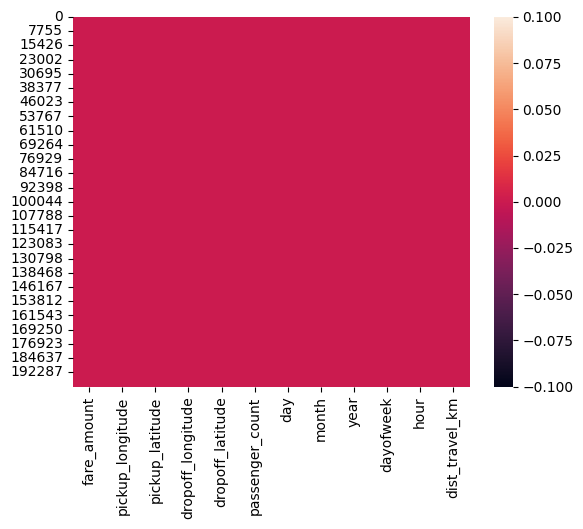

In [32]:
#free of null values,no correlation exists since r=0(false is a constant value which is not related to the index of each row in the df)
sns.heatmap(bool_df)

c:\Users\hp\Downloads\uber-fare-prediction-master\uber-fare-prediction-master\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\hp\Downloads\uber-fare-prediction-master\uber-fare-prediction-master\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

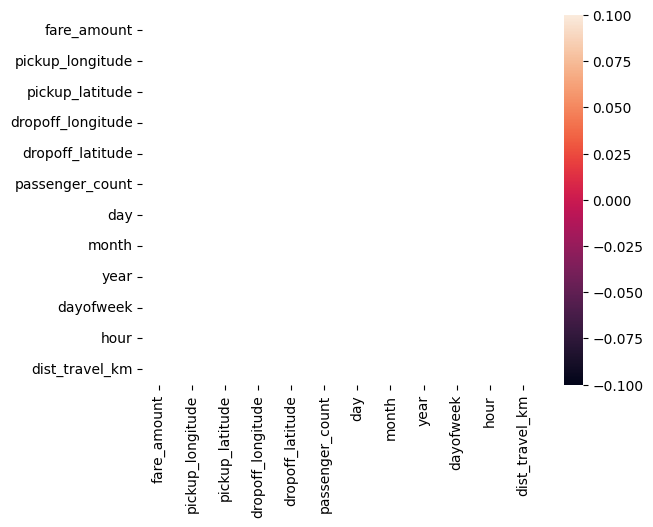

In [33]:
sns.heatmap(bool_df.corr())

In [ ]:
corr=df.corr()  #function to find the correlationcorr=df.corr()  #function to find the correlation

In [35]:
corr

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.187081        -0.118876   
pickup_longitude      0.187081          1.000000         0.434000   
pickup_latitude      -0.118876          0.434000         1.000000   
dropoff_longitude     0.267905          0.241301         0.147671   
dropoff_latitude     -0.133182          0.164082         0.359743   
passenger_count       0.020141         -0.010756        -0.012832   
day                  -0.000659         -0.003195        -0.004162   
month                 0.026700         -0.000869        -0.007766   
year                  0.160104          0.009909        -0.013991   
dayofweek             0.009002         -0.026436        -0.044478   
hour                 -0.030024          0.013554         0.034822   
dist_travel_km        0.800486          0.122834        -0.140490   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.267905         -0.133182         0.020141   
pickup_longitude            0.241301          0.164082        -0.010756   
pickup_latitude             0.147671          0.359743        -0.012832   
dropoff_longitude           1.000000          0.397494        -0.007912   
dropoff_latitude            0.397494          1.000000        -0.006696   
passenger_count            -0.007912         -0.006696         1.000000   
day                        -0.002076         -0.001925         0.008651   
month                      -0.001866         -0.005974         0.005801   
year                        0.019343         -0.011458        -0.007955   
dayofweek                   0.001495         -0.028507         0.049294   
hour                       -0.057209          0.014162         0.021630   
dist_travel_km              0.257802         -0.107320         0.015564   

                        day     month      year  dayofweek      hour  \
fare_amount       -0.000659  0.026700  0.160104   0.009002 -0.030024   
pickup_longitude  -0.003195 -0.000869  0.009909  -0.026436  0.013554   
pickup_latitude   -0.004162 -0.007766 -0.013991  -0.044478  0.034822   
dropoff_longitude -0.002076 -0.001866  0.019343   0.001495 -0.057209   
dropoff_latitude  -0.001925 -0.005974 -0.011458  -0.028507  0.014162   
passenger_count    0.008651  0.005801 -0.007955   0.049294  0.021630   
day                1.000000 -0.019512 -0.009257   0.007761  0.002183   
month             -0.019512  1.000000 -0.119491  -0.008670 -0.001800   
year              -0.009257 -0.119491  1.000000   0.010590  0.001967   
dayofweek          0.007761 -0.008670  0.010590   1.000000 -0.095214   
hour               0.002183 -0.001800  0.001967  -0.095214  1.000000   
dist_travel_km    -0.000908  0.005938  0.017393   0.028728 -0.047918   

                   dist_travel_km  
fare_amount              0.800486  
pickup_longitude         0.122834  
pickup_latitude         -0.140490  
dropoff_longitude        0.257802  
dropoff_latitude        -0.107320  
passenger_count          0.015564  
day                     -0.000908  
month                    0.005938  
year                     0.017393  
dayofweek                0.028728  
hour                    -0.047918  
dist_travel_km           1.000000

<Axes: >

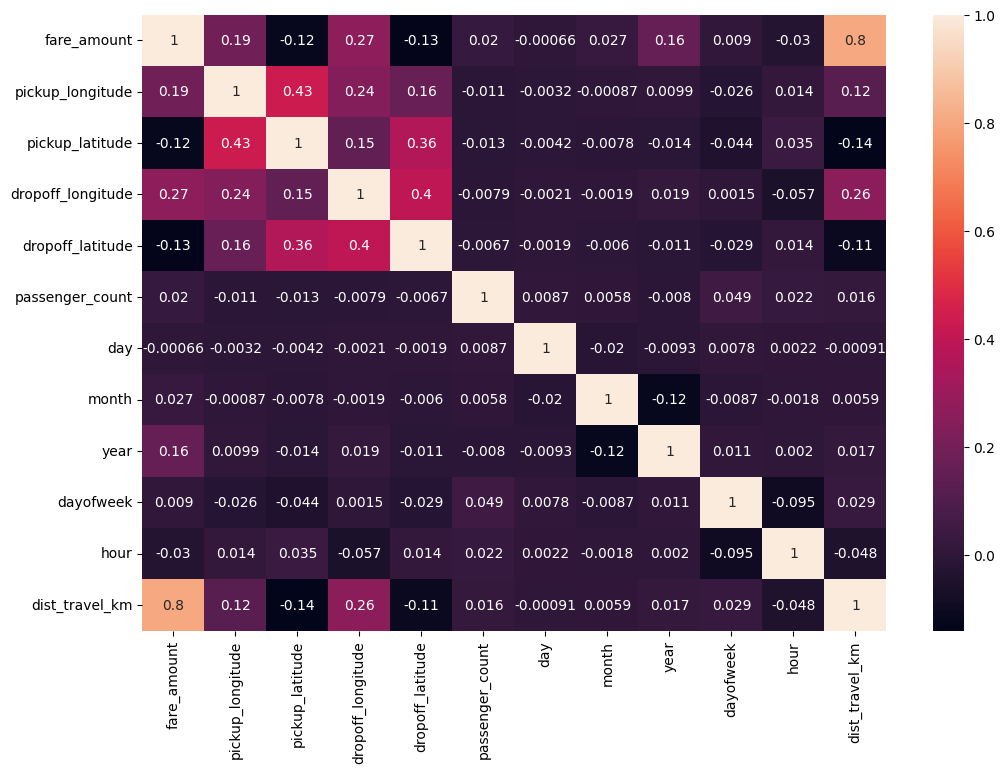

In [36]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)#correlation heatmap(light value means highly correlated)

In [37]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'day',
       'month', 'year', 'dayofweek', 'hour', 'dist_travel_km'],
      dtype='object')

In [38]:
x=df.iloc[:,1:12].values


In [39]:
y=df.iloc[:,0:1].values
y

array([[ 4.5 ],
       [16.9 ],
       [ 5.7 ],
       ...,
       [ 6.9 ],
       [18.  ],
       [22.25]], shape=(162243, 1))

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [41]:
# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# print("model.intercept_",model.intercept_) #to find the linear intercept
# print("model.coef_ ",model.coef_ ) #to find the linear coefficients parameters (11 features so 11 parameters)


In [42]:
# for i in range(0,len(model.coef_)):
#     print('theta',i,"=",model.coef_[i])

In [43]:
# y_test = y_test.flatten()
# y_pred = y_pred.flatten()


In [44]:
# comparison=pd.DataFrame({"Actual label":y_test,"predicted label":y_pred})

In [45]:
# sns.heatmap(comparison.corr())

In [46]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import root_mean_squared_error
# score=r2_score(y_test,y_pred)
# mae=mean_squared_error(y_test,y_pred)
# Rmse=root_mean_squared_error(y_test,y_pred)
# print('R2 score:',score)
# print("mean_squared_error:",mae)
# print("Rmse:",Rmse)

In [47]:
#random forest regressor
#here n_estimators means number of trees you want to build before making the prediction
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


c:\Users\hp\Downloads\uber-fare-prediction-master\uber-fare-prediction-master\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
score=r2_score(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
Rmse=root_mean_squared_error(y_test,y_pred)
print('R2 score:',score)
print("mean_squared_error:",mae)
print("Rmse:",Rmse)

R2 score: 0.8276904421380624
mean_squared_error: 4.921583305428267
Rmse: 2.2184641771793987


In [49]:
comparison=pd.DataFrame({"Actual label":y_test,"predicted label":y_pred})

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
comparison

Actual label  predicted label
0               4.9           6.1620
1              10.5          10.2300
2               8.0           8.5383
3              14.6          10.0590
4              10.0          11.3950
...             ...              ...
48842          20.5          20.1040
48843          22.0          18.5750
48844           6.0           6.8700
48845           9.3           7.0600
48846           7.7           9.5945

[48847 rows x 2 columns]

In [ ]:
comparison.reset_index()

index  Actual label  predicted label
0          0           4.9           6.1620
1          1          10.5          10.2300
2          2           8.0           8.5383
3          3          14.6          10.0590
4          4          10.0          11.3950
...      ...           ...              ...
48842  48842          20.5          20.1040
48843  48843          22.0          18.5750
48844  48844           6.0           6.8700
48845  48845           9.3           7.0600
48846  48846           7.7           9.5945

[48847 rows x 3 columns]

In [ ]:
joblib.dump(rf, "uber_fare_model.pkl")
print("✅ Model saved as uber_fare_model.pkl")

In [ ]:
# df = df[(df['distance_km'] > 0.001) & (df['distance_km'] < 100)]
# df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
# df = df[df['fare_amount'] < 500]


In [ ]:
# df.plot(kind='box',subplots=False,layout=(7,2),figsize=(15,20))

In [ ]:
# # Fare distribution
# plt.figure(figsize=(6,4))
# sns.histplot(df['fare_amount'], bins=50, kde=True)
# plt.title("Distribution of Fare Amount")
# plt.show()

# # Distance distribution
# plt.figure(figsize=(6,4))
# sns.histplot(df['distance_km'], bins=50, kde=True)
# plt.title("Distribution of Trip Distance (km)")
# plt.show()

# # Relation: distance vs fare
# plt.figure(figsize=(6,4))
# sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.3)
# plt.title("Fare vs Distance")
# plt.show()

# # Average fare by hour
# df.groupby('hour')['fare_amount'].mean().plot(kind='bar', figsize=(10,4), title="Average Fare by Hour")
# plt.show()


In [ ]:
# x = df.drop('fare_amount',axis=1)
# y = df['fare_amount'].values.ravel() 

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Linear Regression RMSE:", rmse)


In [ ]:
# # from sklearn.ensemble import RandomForestRegressor

# # rf = RandomForestRegressor(random_state=42)
# # rf.fit(X_train, y_train)

# # y_pred= rf.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# # print("Random Forest RMSE:", rmse)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # ✅ Use fewer trees (faster)
# rf = RandomForestRegressor(
#     n_estimators=50,   # default = 100, reduce to 50 for speed
#     max_depth=15,      # limit depth of trees
#     n_jobs=-1,         # use all CPU cores
#     random_state=42
# )

# # Train
# rf.fit(X_train, y_train)

# # ✅ Predict only on a subset of test data for speed
# sample_size = 10000  # change to 10_000 if you want
# y_pred = rf.predict(X_test[:sample_size])
# y_true = y_test[:sample_size]

# # Evaluate
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# print("Fast Random Forest RMSE:", rmse)



In [ ]:
# joblib.dump(rf, "uber_fare_model.pkl")
# print("✅ Model saved as uber_fare_model.pkl")

In [ ]:
# # 4️⃣ Define hyperparameter space
# param_dist = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }


In [ ]:
# #  5️⃣ Halving Random Search (fast)
# halving_search = HalvingRandomSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_distributions=param_dist,
#     factor=3,       # reduce candidates aggressively
#     cv=3,
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# halving_search.fit(X_train, y_train)


In [ ]:
# # Predictions
# y_pred_best = best_rf.predict(X_test)

In [ ]:
# Best model
# best_rf = random_search.best_estimator_

In [ ]:
# rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
# print("Tuned Random Forest RMSE (RandomizedSearchCV):", rmse_best)

In [ ]:
# joblib.dump(best_rf, "uber_fare_model.pkl")
# print("Model saved successfully ✅")

In [ ]:
# sns.boxplot(y='pickup_longitude      3762',data=df)

In [ ]:
# data.dropna(how='any',inplace=True)

In [ ]:
# min_lat = -90
# max_lat = 90
# min_long = -180
# max_long = 180

In [ ]:
# data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
# data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
# data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
# data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

In [ ]:
# fig, axs = plt.subplots(4, figsize=(6,20))

# sns.histplot(data['pickup_longitude'], ax=axs[0], kde=True)
# sns.histplot(data['dropoff_longitude'], ax=axs[1], kde=True)
# sns.histplot(data['pickup_latitude'], ax=axs[2], kde=True)
# sns.histplot(data['dropoff_latitude'], ax=axs[3], kde=True)

In [ ]:
# numeric_data = data.select_dtypes(include=['float64', 'int64'])
# plt.figure(figsize=(15,10))
# sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')


In [ ]:
# x = data.drop('fare_amount',axis=1)
# y = data['fare_amount']

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # create the model
# regressor = RandomForestRegressor(
#     n_estimators=100,      # how many trees (100 is default good choice)
#     random_state=42        # same result every time
# )

# # train the model
# regressor.fit(x_train, y_train)


In [ ]:
# regressor.fit(x_train,y_train)

In [ ]:
# regressor.score(x_train,y_train)

In [ ]:
# predict = regressor.predict(x_test)

In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# print("RMSE is: ", np.sqrt(mean_squared_error(y_test,predict)))

In [ ]:
# import pickle

# FileName = 'UberFarePredictor.pkl'

# with open(FileName, 'wb') as f:
#     pickle.dump(regressor, f)

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param = [
#     {
#         "n_estimators":[10,50,100,200],
#         "max_depth":[5,8,15,25,30,None],
#         "min_samples_leaf":[1,2,5,10,25,100],
#         "max_leaf_nodes":[2,5,10]
#     }
# ]

In [ ]:
# grid = GridSearchCV(regressor,param_grid=param, cv=5, n_jobs=-1, verbose=3)

In [ ]:
#best_model = grid.fit(x_train,y_train)

In [ ]:
#best_model

In [ ]:
# import joblib
# joblib.dump(regressor, "uber_fare_model.pkl")
